# FIRST ATTEMPT TO CNN

The purpose of this first file is to implement a Convolutional Neural Network able to classify the images in the different classes with an accuracy of at least 30%.

Initially, the data must be read and pre-processed. In general it is necessary to convert the images to grayscale and resize the various images to 64x64 pixels.

## Libreries

List of list of libraries used

In [1]:
import os
import glob
import cv2 as cv2
import numpy as np
import keras as ks
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

import import_ipynb
import dataSetUtility as dsu

importing Jupyter notebook from dataSetUtility.ipynb


## DATA PREPROCESSING 

In the following cells we construct and prepare the data for CNN

In [14]:
#path to the directories
pathTrain=r'C:\Users\adria\Desktop\CVPR\ImageSet\train'
pathTest=r'C:\Users\adria\Desktop\CVPR\ImageSet\test'

labels = [os.path.basename(i) for i in glob.glob(pathTrain + '/*', recursive=True)]
numberOfClasses = len(labels)
print("Class number: ", numberOfClasses)
print("Class names: ", labels)

Class number:  15
Class names:  ['Bedroom', 'Coast', 'Forest', 'Highway', 'Industrial', 'InsideCity', 'Kitchen', 'LivingRoom', 'Mountain', 'Office', 'OpenCountry', 'Store', 'Street', 'Suburb', 'TallBuilding']


In [3]:
xTrainRaw, yTrainRaw = dsu.loadImages(pathTrain, labels)
xTest, yTest = dsu.loadImages(pathTest, labels)

print('len train x: ',len(xTrainRaw))
print('len test x: ',len(xTest))
print('len train y: ',len(yTrainRaw))
print('len test y: ',len(yTest))

len train x:  1500
len test x:  2985
len train y:  1500
len test y:  2985


Now we resize the images in a correct dimention

In [4]:
xTrainRaw = dsu.reshape(xTrainRaw, 64,64,1)
xTest = dsu.reshape(xTest,64,64,1)

Convert the labels into a set of numbers to input into the neural net work

In [5]:
yTrainCategorical = to_categorical(yTrainRaw)
yTestCategorical = to_categorical(yTest)

Split the training set into train set (85%) and validation set (15%)

In [6]:
xTrain, xValidation, yTrain, yValidation = train_test_split(xTrainRaw, yTrainCategorical, train_size=0.85, random_state=275)
print('len Train Set: ',len(xTrain))
print('len Validation Set: ',len(xValidation))
print('len Test Set: ',len(xTest))

len Train Set:  1275
len Validation Set:  225
len Test Set:  2985


# CNN MODEL

To buil the model we need to create the architecture and add the layer to extract features from the input images. 

In [7]:
sgd = ks.optimizers.SGD(momentum=0.9,nesterov=True)
norm = ks.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
baseModel = Sequential([
    #first convolutional layer
    Conv2D(8, 3,strides=1, padding='valid',input_shape=(64,64,1)),
    Activation('relu'),
    MaxPooling2D(pool_size=2,strides=2),
    
    #second convolutional layer
    Conv2D(16, 3,strides=1, padding='valid',input_shape=(64,64,1)),
    Activation('relu'),
    MaxPooling2D(pool_size=2,strides=2),
    
    #third convolutional layer
    Conv2D(32, 3,strides=1, padding='valid',input_shape=(64,64,1)),
    Activation('relu'),
    Flatten(),
    Dense(numberOfClasses, activation='relu',kernel_initializer=norm, bias_initializer='zeros'),
    Dense(numberOfClasses, activation='softmax')
])

baseModel.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])


# MODEL TRANING AND TESTING

Now we train our CNN and visualizze the training results. We also implement the earlystopping in order to stop the training before the end of epochs if it is necessary

In [8]:
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10, monitor='val_loss')

history=baseModel.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])

Epoch 1/100
40/40 [==============================] - 3s 53ms/step - loss: 2.7090 - accuracy: 0.0637 - val_loss: 2.7100 - val_accuracy: 0.0667
Epoch 2/100
40/40 [==============================] - 1s 22ms/step - loss: 2.7079 - accuracy: 0.0702 - val_loss: 2.7094 - val_accuracy: 0.0711
Epoch 3/100
40/40 [==============================] - 1s 23ms/step - loss: 2.7067 - accuracy: 0.0841 - val_loss: 2.7097 - val_accuracy: 0.0533
Epoch 4/100
40/40 [==============================] - 1s 24ms/step - loss: 2.7039 - accuracy: 0.0756 - val_loss: 2.7084 - val_accuracy: 0.0667
Epoch 5/100
40/40 [==============================] - 1s 22ms/step - loss: 2.7000 - accuracy: 0.0834 - val_loss: 2.7036 - val_accuracy: 0.0756
Epoch 6/100
40/40 [==============================] - 1s 24ms/step - loss: 2.6883 - accuracy: 0.1146 - val_loss: 2.7234 - val_accuracy: 0.0533
Epoch 7/100
40/40 [==============================] - 1s 24ms/step - loss: 2.6566 - accuracy: 0.1044 - val_loss: 2.6396 - val_accuracy: 0.1022
Epoch 

Valuate the model and predict a classes

In [9]:
baseModel.evaluate(xTest, yTestCategorical)
#predict classes
prediction = baseModel.predict(xTest)

#safe only best class for all prediction 
yPred = list() 
for x in prediction: 
    yPred.append(np.argmax(x))

94/94 [==============================] - 1s 6ms/step - loss: 4.5036 - accuracy: 0.3544


We now obtain the confusion matrix

In [10]:
cm=confusion_matrix(yTest, yPred)

# PLOTTING

In the remaining cells We perform some plots that can be interested to comment

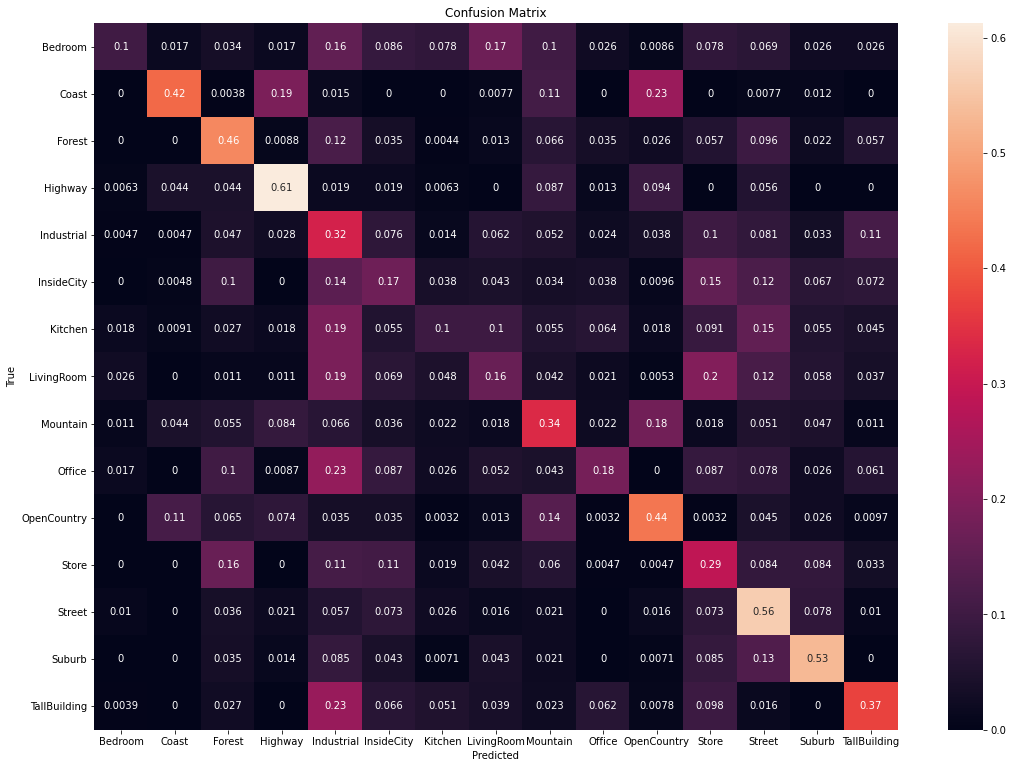

In [11]:
dsu.plotConfusionMatrix(cm, labels, "confusion_matrix_1", "images_point_one/")

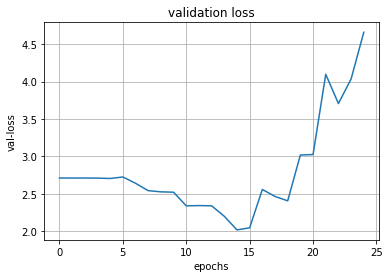

In [12]:
plt.title("validation loss")
plt.xlabel("epochs")
plt.ylabel("val-loss")
plt.plot(history.history['val_loss'])
plt.grid()
plt.savefig("images_point_one/validation_loss.jpg")

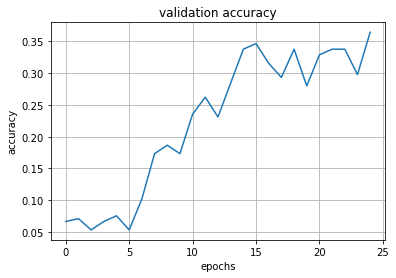

In [13]:
plt.title("validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.savefig("images_point_one/validation_accuracy.jpg")

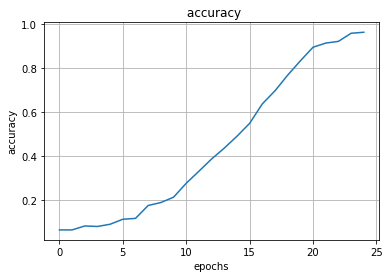

In [14]:
plt.title(" accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['accuracy'])
plt.grid()
plt.savefig("images_point_one/accuracy.jpg")

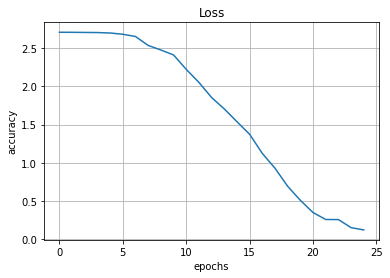

In [15]:
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['loss'])
plt.grid()
plt.savefig("images_point_one/loss.jpg")

In [17]:
print('Classification Report')
print(classification_report(yTest, yPred, target_names=labels))

Classification Report
              precision    recall  f1-score   support

     Bedroom       0.41      0.10      0.17       116
       Coast       0.65      0.42      0.51       260
      Forest       0.41      0.46      0.44       228
     Highway       0.46      0.61      0.52       160
  Industrial       0.18      0.32      0.23       211
  InsideCity       0.20      0.17      0.18       208
     Kitchen       0.15      0.10      0.12       110
  LivingRoom       0.23      0.16      0.19       189
    Mountain       0.34      0.34      0.34       274
      Office       0.26      0.18      0.21       115
 OpenCountry       0.47      0.44      0.45       310
       Store       0.25      0.29      0.27       215
      Street       0.35      0.56      0.43       192
      Suburb       0.41      0.53      0.47       141
TallBuilding       0.52      0.37      0.43       256

    accuracy                           0.35      2985
   macro avg       0.35      0.34      0.33      2985
weig

# Conclusion First Point


With this CNN we have an accuracy of 35%. The next goal is to improve this result.